Lambda School Data Science

*Unit 2, Sprint 2, Module 3*

---

# Cross-Validation


## Assignment
- [ ] [Review requirements for your portfolio project](https://lambdaschool.github.io/ds/unit2), then submit your dataset.
- [ ] Continue to participate in our Kaggle challenge. 
- [ ] Use scikit-learn for hyperparameter optimization with RandomizedSearchCV.
- [ ] Submit your predictions to our Kaggle competition. (Go to our Kaggle InClass competition webpage. Use the blue **Submit Predictions** button to upload your CSV file. Or you can use the Kaggle API to submit your predictions.)
- [ ] Commit your notebook to your fork of the GitHub repo.


**You can't just copy** from the lesson notebook to this assignment.

- Because the lesson was **regression**, but the assignment is **classification.**
- Because the lesson used [TargetEncoder](https://contrib.scikit-learn.org/categorical-encoding/targetencoder.html), which doesn't work as-is for _multi-class_ classification.

So you will have to adapt the example, which is good real-world practice.

1. Use a model for classification, such as [RandomForestClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html)
2. Use hyperparameters that match the classifier, such as `randomforestclassifier__ ...`
3. Use a metric for classification, such as [`scoring='accuracy'`](https://scikit-learn.org/stable/modules/model_evaluation.html#common-cases-predefined-values)
4. If you’re doing a multi-class classification problem — such as whether a waterpump is functional, functional needs repair, or nonfunctional — then use a categorical encoding that works for multi-class classification, such as [OrdinalEncoder](https://contrib.scikit-learn.org/categorical-encoding/ordinal.html) (not [TargetEncoder](https://contrib.scikit-learn.org/categorical-encoding/targetencoder.html))



## Stretch Goals

### Reading
- Jake VanderPlas, [Python Data Science Handbook, Chapter 5.3](https://jakevdp.github.io/PythonDataScienceHandbook/05.03-hyperparameters-and-model-validation.html), Hyperparameters and Model Validation
- Jake VanderPlas, [Statistics for Hackers](https://speakerdeck.com/jakevdp/statistics-for-hackers?slide=107)
- Ron Zacharski, [A Programmer's Guide to Data Mining, Chapter 5](http://guidetodatamining.com/chapter5/), 10-fold cross validation
- Sebastian Raschka, [A Basic Pipeline and Grid Search Setup](https://github.com/rasbt/python-machine-learning-book/blob/master/code/bonus/svm_iris_pipeline_and_gridsearch.ipynb)
- Peter Worcester, [A Comparison of Grid Search and Randomized Search Using Scikit Learn](https://blog.usejournal.com/a-comparison-of-grid-search-and-randomized-search-using-scikit-learn-29823179bc85)

### Doing
- Add your own stretch goals!
- Try other [categorical encodings](https://contrib.scikit-learn.org/categorical-encoding/). See the previous assignment notebook for details.
- In additon to `RandomizedSearchCV`, scikit-learn has [`GridSearchCV`](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html). Another library called scikit-optimize has [`BayesSearchCV`](https://scikit-optimize.github.io/notebooks/sklearn-gridsearchcv-replacement.html). Experiment with these alternatives.
- _[Introduction to Machine Learning with Python](http://shop.oreilly.com/product/0636920030515.do)_ discusses options for "Grid-Searching Which Model To Use" in Chapter 6:

> You can even go further in combining GridSearchCV and Pipeline: it is also possible to search over the actual steps being performed in the pipeline (say whether to use StandardScaler or MinMaxScaler). This leads to an even bigger search space and should be considered carefully. Trying all possible solutions is usually not a viable machine learning strategy. However, here is an example comparing a RandomForestClassifier and an SVC ...

The example is shown in [the accompanying notebook](https://github.com/amueller/introduction_to_ml_with_python/blob/master/06-algorithm-chains-and-pipelines.ipynb), code cells 35-37. Could you apply this concept to your own pipelines?


In [1]:
%%capture
import sys

# If you're on Colab:
if 'google.colab' in sys.modules:
    DATA_PATH = 'https://raw.githubusercontent.com/LambdaSchool/DS-Unit-2-Kaggle-Challenge/master/data/'
    !pip install category_encoders==2.*

# If you're working locally:
else:
    DATA_PATH = '../data/'

In [2]:
import pandas as pd

# Merge train_features.csv & train_labels.csv
train = pd.merge(pd.read_csv(DATA_PATH+'waterpumps/train_features.csv'), 
                 pd.read_csv(DATA_PATH+'waterpumps/train_labels.csv'))

# Read test_features.csv & sample_submission.csv
test = pd.read_csv(DATA_PATH+'waterpumps/test_features.csv')
sample_submission = pd.read_csv(DATA_PATH+'waterpumps/sample_submission.csv')

In [3]:
# Imports:
import numpy as np
import pandas as pd
import plotly.express as px
import category_encoders as ce
import matplotlib.pyplot as plt
%matplotlib inline
import graphviz
import itertools
import seaborn as sns
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV, LinearRegression, Ridge
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor, export_graphviz
from math import floor
from IPython.display import display, HTML
from ipywidgets import interact
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split, cross_val_score, validation_curve, GridSearchCV, RandomizedSearchCV, KFold
from scipy.stats import randint, uniform
from sklearn.metrics import mean_absolute_error

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning:

pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.



## Assignment

- [Review requirements for your portfolio project](https://lambdaschool.github.io/ds/unit2),   <--- DONE !
 - then submit your dataset.

- Continue to participate in our Kaggle challenge.   <--- DONE !



**You can't just copy** from the lesson notebook to this assignment.

- Because the lesson was **regression**, but the assignment is **classification.**
- Because the lesson used [TargetEncoder](https://contrib.scikit-learn.org/categorical-encoding/targetencoder.html), which doesn't work as-is for _multi-class_ classification.

So you will have to adapt the example, which is good real-world practice.

1. Use a model for classification, such as [RandomForestClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html)
2. Use hyperparameters that match the classifier, such as `randomforestclassifier__ ...`
3. Use a metric for classification, such as [`scoring='accuracy'`](https://scikit-learn.org/stable/modules/model_evaluation.html#common-cases-predefined-values)
4. If you’re doing a multi-class classification problem — such as whether a waterpump is functional, functional needs repair, or nonfunctional — then use a categorical encoding that works for multi-class classification, such as [OrdinalEncoder](https://contrib.scikit-learn.org/categorical-encoding/ordinal.html) (not [TargetEncoder](https://contrib.scikit-learn.org/categorical-encoding/targetencoder.html))

### Code decided not to use:

In [4]:
  # # Treat the outlier in latitude:
  # train['latitude'] = train['latitude'].replace(-2e-08, 0)

In [5]:
# # Look at the stats of the Longitude and Latitude:
# train[['longitude', 'latitude']].describe()

In [6]:
# # Plot the longitude and latitude on a scatter map plot:
# fig = px.scatter_mapbox(train, lat='latitude', lon='longitude', color='status_group', 
#                         opacity=0.5)
# fig.update_layout(mapbox_style='stamen-terrain')
# fig.show()

In [7]:
# # Create an array of coordinates for train set:
# train_loc = train[['longitude', 'latitude']]
# coords = train_loc

# # Create an array of coordinates for test set:
# test_loc = test[['longitude', 'latitude']]
# coords_test = test_loc

# # Check my work:
# coords.head()

In [8]:
# # Create a Kmeans model for train set:
# dist = []
# K = range(1, 20)
# for k in K:
#   kmeans_mod = KMeans(n_clusters=k, random_state=42)
#   kmeans_model = kmeans_mod.fit(coords)
#   dist.append(kmeans_model.inertia_)

# # Create a Kmeans model for test set:
# dist2 = []
# K2 = range(1, 20)
# for k in K2:
#   kmeans_mod2 = KMeans(n_clusters=k, random_state=42)
#   kmeans_model2 = kmeans_mod2.fit(coords_test)
#   dist2.append(kmeans_model2.inertia_)

In [9]:
# # Create an elbow method for optimal k (train set):
# fig, ax = plt.subplots(figsize=(15, 10), facecolor='white')
# plt.plot(K, dist, marker='o')
# plt.xlabel('K', fontsize=14, fontweight='bold')
# plt.ylabel('Distortions', fontsize=14, fontweight='bold')
# plt.title('Elbow Method for Optimal K (train set)', size=18, weight='bold');

In [10]:
# # Use kmeans clustering to engineer a new feature based on elbow method to find k:
# kmeans = KMeans(n_clusters=15)
# kmeans2 = KMeans(n_clusters=15)

# # Fit kmeans:
# kmeans.fit(coords)
# kmeans2.fit(coords_test)

# # Engineer new feature (train):
# loc_cluster = kmeans.predict(train[['longitude', 'latitude']])
# train['loc_cluster'] = pd.Series(loc_cluster, index=train.index)

# # Need to add new feature to test set too:
# loc_cluster2 = kmeans2.predict(test[['longitude', 'latitude']])
# test['loc_cluster'] = pd.Series(loc_cluster2, index=test.index)

# # Check my work:
# train.head()

In [11]:
# # Plot the longitude and latitude on a scatter map plot with clusters (train):
# fig = px.scatter_mapbox(train, lat='latitude', lon='longitude', color='loc_cluster', 
#                         opacity=0.5)
# fig.update_layout(mapbox_style='stamen-terrain')
# fig.show()

In [12]:
# # Plot the longitude and latitude on a scatter map plot with clusters (test):
# fig = px.scatter_mapbox(test, lat='latitude', lon='longitude', color='loc_cluster', 
#                         opacity=0.5)
# fig.update_layout(mapbox_style='stamen-terrain')
# fig.show()

In [13]:
# # Look at the new feature's value counts (train):
# print ('Observations =', train['loc_cluster'].shape[0], '\n')
# print ('Number of Observations with 0:\n\nLongitude =', 
#        (train['longitude'] == 0).value_counts()[1], '\n\nLatitude =', 
#        (train['latitude'] == 0).value_counts()[1], '\n')
# train['loc_cluster'].value_counts(ascending=False)

In [14]:
# # Look at the new feature's value counts (test):
# print ('Observations =', test['loc_cluster'].shape[0], '\n')
# print ('Number of Observations with 0:\n\nLongitude =\n', 
#        (test['longitude'] == 0).value_counts(), '\n\nLatitude =\n', 
#        (test['latitude'] == 0).value_counts(), '\n')
# test['loc_cluster'].value_counts(ascending=False)

In [15]:
# # Replace all the 2 clusters with 15 and 0 with 2, then replace 15 with 0 on train set:
# train['loc_cluster'] = train['loc_cluster'].replace(1, 15)
# train['loc_cluster'] = train['loc_cluster'].replace(0, 1)
# train['loc_cluster'] = train['loc_cluster'].replace(15, 0)

# # Replace all the 1 clusters with 15 and 0 with 1, then replace 15 with 0 on test set:
# test['loc_cluster'] = test['loc_cluster'].replace(1, 15)
# test['loc_cluster'] = test['loc_cluster'].replace(0, 1)
# test['loc_cluster'] = test['loc_cluster'].replace(15, 0)

# # Check my work:
# train['loc_cluster'].value_counts(), test['loc_cluster'].value_counts()

In [16]:
# # Create a function to clean the data some:
# def wrangle(x):
#   '''
#   This will wrangle the train, validate, and test set in the same way.
#   '''
#   # Prevent SettingWithCopyWarning:
#   x = x.copy()

#   # Treat the outlier in latitude:
#   x['latitude'] = x['latitude'].replace(-2e-08, 0)

# #   # Replace 0 cluster with NaN to impute later:
# #   x['loc_cluster'] = x['loc_cluster'].replace(0, np.nan)

#   # Replace 0's with NaN's (will impute later) when they don't belong and create missing columns:
#   cols_w_zeros = ['construction_year', 'gps_height', 'population']
#   for col in cols_w_zeros:
#     x[col] = x[col].replace(0, np.nan)
#     x[col+'_MISSING'] = x[col].isnull()

#   # Drop cols that are not usable (never varies or always varies):
#   x = x.drop(columns=['recorded_by', 'id'])

#   # Drop duplicate or near dupllicate columns:
#   x = x.drop(columns=['quantity_group'])
  
#   # Convert date_recorded to datetime:
#   x['date_recorded'] = pd.to_datetime(x['date_recorded'], infer_datetime_format=True)

#   # Extract month, day, and year, then drop original:
#   x['month_rec'] = x['date_recorded'].dt.month
#   x['day_rec'] = x['date_recorded'].dt.day
#   x['year_rec'] = x['date_recorded'].dt.year
#   x = x.drop(columns='date_recorded')

#   # Create some new features (year_rec - construction_year) and years missing:
#   x['age_when_rec'] = x['year_rec'] - x['construction_year']
#   x['ages_MISSING'] = x['age_when_rec'].isnull()

#   # Assign mean to values that are negitive:
#   for val in x['age_when_rec']:
#     x['age_when_rec'] =  x['age_when_rec'].where(x[val] < 0, 
#                                                    x['age_when_rec'].mean())

#   # Change region_code and district_code to a string type:
#   x['region_code'] = x['region_code'].astype(str)
#   x['district_code'] = x['district_code'].astype(str)

#   # Create a new feature (region + region_code):
#   x['regions'] = x['region'].str.cat(x['region_code'], sep=', Code: ').str.cat(x['district_code'], 
#                                                                                sep=', District: ')

#   # Create a new feature (source, source_type, + source_class):
#   x['sources'] = x['source_class'].str.cat(x['source_type'], sep=' - ').str.cat(x['source'], sep=' - ')

#   # Create a new feature (source, source_type, + source_class):
#   x['manager'] = x['management_group'].str.cat(x['scheme_management'], 
#                                                sep=' - ').str.cat(x['management'], sep=' - ')

#   # Create a new feature (extraction types):
#   x['type_of_extraction'] = x['extraction_type_class'].str.cat(x['extraction_type_group'], 
#                                                              sep=' - ').str.cat(x['extraction_type'], sep=' - ')

#   # Create a new feature (source, source_type, + source_class):
#   x['waterpoints'] = x['waterpoint_type'].str.cat(x['waterpoint_type_group'], sep=' - ')

#   # Create a new feature (source, source_type, + source_class):
#   x['quality_of_water'] = x['quality_group'].str.cat(x['water_quality'], sep=' - ')

#   # Replace values with less than 2 count with other to reduce some of the noise in the dataset:
#   val_ct_wpt = x['wpt_name'].value_counts()
#   others_wpt = val_ct_wpt.index[val_ct_wpt < 2]
#   x.loc[x['wpt_name'].isin(others_wpt), 'wpt_name'] = 'other'

#   # Replace values with less than 4 count with other to reduce some of the noise in the dataset:
#   val_ct_sub = x['subvillage'].value_counts()
#   others_sub = val_ct_sub.index[val_ct_sub < 4]
#   x.loc[x['subvillage'].isin(others_sub), 'subvillage'] = 'other'

#   # Replace values with less than 34 count with other to reduce some of the noise in the dataset:
#   val_ct_ward = x['ward'].value_counts()
#   others_ward = val_ct_ward.index[val_ct_ward < 34]
#   x.loc[x['ward'].isin(others_ward), 'ward'] = 'other'

#   # Replace values with less than 11 count with other to reduce some of the noise in the dataset:
#   val_ct_sch = x['scheme_name'].value_counts()
#   others_sch = val_ct_sch.index[val_ct_sch < 11]
#   x.loc[x['scheme_name'].isin(others_sch), 'scheme_name'] = 'other'

#   # Return the new wrangled dataframe:
#   return x

# # Run the function on all 3 sets:
# train = wrangle(train)
# val = wrangle(val)
# test = wrangle(test)

# # Check my work by looking at the shape of all and first 5 rows of the train set:
# print ('Train:      Observations =', train.shape[0], '  Features =', train.shape[1], '\n')
# print ('Validate: Observations =', val.shape[0], '    Features =', val.shape[1], '\n')
# print ('Test:       Observations =', test.shape[0], '   Features =', test.shape[1], '\n')
# train.head()

### Start of code I am using:

In [17]:
# Look at the value counts of region for verification that new dataframe is correct:
train['region'].value_counts()

Iringa           5294
Shinyanga        4982
Mbeya            4639
Kilimanjaro      4379
Morogoro         4006
Arusha           3350
Kagera           3316
Mwanza           3102
Kigoma           2816
Ruvuma           2640
Pwani            2635
Tanga            2547
Dodoma           2201
Singida          2093
Mara             1969
Tabora           1959
Rukwa            1808
Mtwara           1730
Manyara          1583
Lindi            1546
Dar es Salaam     805
Name: region, dtype: int64

In [18]:
# Show all values:
pd.set_option('display.max_rows', 125)

# Define a function to create a dataframe from value counts:
def val_cnts(df, col_name, name):
  col_name = pd.DataFrame(df.value_counts())
  col_name.reset_index(inplace=True)
  col_name.rename(columns={'index':f'{name}_val', f'{name}':f'{name}_cnt'}, inplace=True)
  
  return col_name

# Test my function:
val_cnts(train['region'], 'region', 'region')

# Join all new dataframes into one to compare values for possible feature engineering:
train_regions = pd.concat([val_cnts(train['region'], 'region', 'region'), 
                           val_cnts(train['region_code'], 'reg_code', 'reg_code'), 
                           val_cnts(train['district_code'], 'dist_code', 'distric_code'), 
                           val_cnts(train['lga'], 'lga', 'lga')], axis=1, sort=False)

# Look at my new dataframe:
train_regions

,region_val,region_cnt,reg_code_val,region_code,distric_code_val,district_code,lga_val,lga_cnt
0,Iringa,5294.0,11.0,5300.0,1.0,12203.0,Njombe,2503
1,Shinyanga,4982.0,17.0,5011.0,2.0,11173.0,Arusha Rural,1252
2,Mbeya,4639.0,12.0,4639.0,3.0,9998.0,Moshi Rural,1251
3,Kilimanjaro,4379.0,3.0,4379.0,4.0,8999.0,Bariadi,1177
4,Morogoro,4006.0,5.0,4040.0,5.0,4356.0,Rungwe,1106
5,Arusha,3350.0,18.0,3324.0,6.0,4074.0,Kilosa,1094
6,Kagera,3316.0,19.0,3047.0,7.0,3343.0,Kasulu,1047
7,Mwanza,3102.0,2.0,3024.0,8.0,1043.0,Mbozi,1034
8,Kigoma,2816.0,16.0,2816.0,30.0,995.0,Meru,1009
9,Ruvuma,2640.0,10.0,2640.0,33.0,874.0,Bagamoyo,997


In [19]:
# Join all new dataframes into one to compare values for possible feature engineering:
train_source = pd.concat([val_cnts(train['source'], 'source', 'source'), 
                           val_cnts(train['source_type'], 'source_type', 'source_type'), 
                           val_cnts(train['source_class'], 'source_class', 'source_class')], axis=1, sort=False)

# Look at my new dataframe:
train_source

,source_val,source_cnt,source_type_val,source_type_cnt,source_class_val,source_class_cnt
0,spring,17021,spring,17021.0,groundwater,45794.0
1,shallow well,16824,shallow well,16824.0,surface,13328.0
2,machine dbh,11075,borehole,11949.0,unknown,278.0
3,river,9612,river/lake,10377.0,NaN,NaN
4,rainwater harvesting,2295,rainwater harvesting,2295.0,NaN,NaN
5,hand dtw,874,dam,656.0,NaN,NaN
6,lake,765,other,278.0,NaN,NaN
7,dam,656,NaN,NaN,NaN,NaN
8,other,212,NaN,NaN,NaN,NaN
9,unknown,66,NaN,NaN,NaN,NaN


In [20]:
# Join all new dataframes into one to compare values for possible feature engineering:
train_extraction = pd.concat([val_cnts(train['extraction_type'], 'extraction_type', 'extraction_type'), 
                              val_cnts(train['extraction_type_group'], 'extraction_group', 'extraction_group'), 
                              val_cnts(train['extraction_type_class'], 'extraction_class', 'extraction_class')], 
                             axis=1, sort=False)

# Look at my new dataframe:
train_extraction

,extraction_type_val,extraction_type_cnt,extraction_group_val,extraction_type_group,extraction_class_val,extraction_type_class
0,gravity,26780,gravity,26780.0,gravity,26780.0
1,nira/tanira,8154,nira/tanira,8154.0,handpump,16456.0
2,other,6430,other,6430.0,other,6430.0
3,submersible,4764,submersible,6179.0,submersible,6179.0
4,swn 80,3670,swn 80,3670.0,motorpump,2987.0
5,mono,2865,mono,2865.0,rope pump,451.0
6,india mark ii,2400,india mark ii,2400.0,wind-powered,117.0
7,afridev,1770,afridev,1770.0,NaN,NaN
8,ksb,1415,rope pump,451.0,NaN,NaN
9,other - rope pump,451,other handpump,364.0,NaN,NaN


In [21]:
# Join all new dataframes into one to compare values for possible feature engineering:
train_man = pd.concat([val_cnts(train['management'], 'management', 'management'), 
                           val_cnts(train['management_group'], 'group', 'group'), 
                           val_cnts(train['scheme_management'], 'scheme_management', 
                                    'scheme_management')], axis=1, sort=False)

# Look at my new dataframe:
train_man

,management_val,management_cnt,group_val,management_group,scheme_management_val,scheme_management_cnt
0,vwc,40507,user-group,52490.0,VWC,36793
1,wug,6515,commercial,3638.0,WUG,5206
2,water board,2933,parastatal,1768.0,Water authority,3153
3,wua,2535,other,943.0,WUA,2883
4,private operator,1971,unknown,561.0,Water Board,2748
5,parastatal,1768,NaN,NaN,Parastatal,1680
6,water authority,904,NaN,NaN,Private operator,1063
7,other,844,NaN,NaN,Company,1061
8,company,685,NaN,NaN,Other,766
9,unknown,561,NaN,NaN,SWC,97


In [22]:
# Join all new dataframes into one to compare values for possible feature engineering:
train_quality = pd.concat([val_cnts(train['water_quality'], 'water_quality', 'water_quality'), 
                           val_cnts(train['quality_group'], 'quality_group', 'quality_group')], axis=1, sort=False)

# Look at my new dataframe:
train_quality

,water_quality_val,water_quality_cnt,quality_group_val,quality_group_cnt
0,soft,50818,good,50818.0
1,salty,4856,salty,5195.0
2,unknown,1876,unknown,1876.0
3,milky,804,milky,804.0
4,coloured,490,colored,490.0
5,salty abandoned,339,fluoride,217.0
6,fluoride,200,NaN,NaN
7,fluoride abandoned,17,NaN,NaN


In [23]:
# Join all new dataframes into one to compare values for possible feature engineering:
train_waterpoint = pd.concat([val_cnts(train['waterpoint_type'], 'waterpoint_type', 'waterpoint_type'), 
                              val_cnts(train['waterpoint_type_group'], 'waterpoint_group', 'waterpoint_group')], 
                             axis=1, sort=False)

# Look at my new dataframe:
train_waterpoint

,waterpoint_type_val,waterpoint_type_cnt,waterpoint_group_val,waterpoint_type_group
0,communal standpipe,28522,communal standpipe,34625.0
1,hand pump,17488,hand pump,17488.0
2,other,6380,other,6380.0
3,communal standpipe multiple,6103,improved spring,784.0
4,improved spring,784,cattle trough,116.0
5,cattle trough,116,dam,7.0
6,dam,7,NaN,NaN


In [24]:
# Split the train dataset into train and validate:
train, val = train_test_split(train, train_size=0.75, test_size=0.25,
                              stratify=train['status_group'], random_state=97)

# Check my work by looking at the number of observations and features:
print ('Train set: Observations =', train.shape[0], 'and Features =', train.shape[1])
print ('Validation set: Observations =', val.shape[0], 'and Features =', val.shape[1])
print ('Test set: Observations =', test.shape[0], 'and Features =', test.shape[1])

Train set: Observations = 44550 and Features = 41
Validation set: Observations = 14850 and Features = 41
Test set: Observations = 14358 and Features = 40


In [25]:
def wrangle(X):
  """Wrangle train, validate, and test sets in the same way"""
  
  # Prevent SettingWithCopyWarning
  X = X.copy()
  
  # About 3% of the time, latitude has small values near zero,
  # outside Tanzania, so we'll treat these values like zero.
  X['latitude'] = X['latitude'].replace(-2e-08, 0)
  
  # When columns have zeros and shouldn't, they arre like null values.
  # So we will replace the zeros with nulls, and impute missing values later.
  # Also create a "missing indicator" column, because the fact that
  # values are missing may be a predictive signal.
  cols_with_zeros = ['longitude', 'latitude', 'construction_year', 
                     'gps_height', 'population']
  for col in cols_with_zeros:
      X[col] = X[col].replace(0, np.nan)
      X[col+'_MISSING'] = X[col].isnull()
          
  # Drop duplicate columns
  duplicates = ['quantity_group', 'payment_type']
  X = X.drop(columns=duplicates)
  
  # Drop recorded_by (never varies) and id (always varies, random)
  unusable_variance = ['recorded_by', 'id']
  X = X.drop(columns=unusable_variance)
  
  # Convert date_recorded to datetime
  X['date_recorded'] = pd.to_datetime(X['date_recorded'], infer_datetime_format=True)
  
  # Extract components from date_recorded, then drop the original column
  X['year_recorded'] = X['date_recorded'].dt.year
  
  X['month_recorded'] = X['date_recorded'].dt.month
  X['day_recorded'] = X['date_recorded'].dt.day
  X = X.drop(columns='date_recorded')
  
  # Engineer feature: how many years from construction_year to date_recorded
  X['years'] = X['year_recorded'] - X['construction_year']
  X['years_MISSING'] = X['years'].isnull()
  
  # return the wrangled dataframe
  return X

train = wrangle(train)
val = wrangle(val)
test = wrangle(test)

# Check my work by looking at the shape of all and first 5 rows of the train set:
print ('Train:      Observations =', train.shape[0], '  Features =', train.shape[1], '\n')
print ('Validate: Observations =', val.shape[0], '    Features =', val.shape[1], '\n')
print ('Test:       Observations =', test.shape[0], '   Features =', test.shape[1], '\n')
train.head()

Train:      Observations = 44550   Features = 46 

Validate: Observations = 14850     Features = 46 

Test:       Observations = 14358    Features = 45 



,amount_tsh,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,basin,subvillage,region,region_code,district_code,lga,ward,population,public_meeting,scheme_management,scheme_name,permit,construction_year,extraction_type,extraction_type_group,extraction_type_class,management,management_group,payment,water_quality,quality_group,quantity,source,source_type,source_class,waterpoint_type,waterpoint_type_group,status_group,longitude_MISSING,latitude_MISSING,construction_year_MISSING,gps_height_MISSING,population_MISSING,year_recorded,month_recorded,day_recorded,years,years_MISSING
44279,0.0,Solidame,254.0,SOLIDAME,36.704884,-8.126436,School,0,Rufiji,Katindiuka A,Morogoro,5,3,Kilombero,Ifakara,882.0,True,NaN,NaN,True,2011.0,nira/tanira,nira/tanira,handpump,vwc,user-group,never pay,soft,good,insufficient,shallow well,shallow well,groundwater,hand pump,hand pump,non functional,False,False,False,False,False,2011,3,16,0.0,False
34716,0.0,Fini Water,352.0,FINI WATER,38.921227,-10.172112,Kiwanjani,0,Ruvuma / Southern Coast,Bondeni Road,Lindi,80,53,Ruangwa,Likunja,600.0,True,VWC,NaN,False,1981.0,nira/tanira,nira/tanira,handpump,vwc,user-group,never pay,salty,salty,insufficient,shallow well,shallow well,groundwater,hand pump,hand pump,functional,False,False,False,False,False,2013,1,26,32.0,False
41823,0.0,Fw,354.0,FW,38.811124,-10.617004,Namilasa,0,Ruvuma / Southern Coast,Nanditi,Mtwara,90,33,Masasi,Lukulendi,1.0,True,VWC,FW,True,1974.0,other,other,other,vwc,user-group,never pay,soft,good,dry,shallow well,shallow well,groundwater,other,other,non functional,False,False,False,False,False,2013,1,21,39.0,False
21636,0.0,Roman Church,1545.0,Roman Church,35.101533,-9.179054,Kwa Cyprian Mhangile,0,Rufiji,Mlangali,Iringa,11,4,Njombe,Kidegembye,45.0,True,VWC,image water supply scheme,True,1994.0,gravity,gravity,gravity,vwc,user-group,never pay,soft,good,dry,river,river/lake,surface,communal standpipe,communal standpipe,non functional,False,False,False,False,False,2011,4,18,17.0,False
41039,20.0,Makondakonde Water Population,743.0,Makonde water population,39.226504,-10.516402,Tangini,0,Ruvuma / Southern Coast,Mkongi Mjini,Mtwara,90,33,Newala,Chilangala,2531.0,True,VWC,Mitema,False,NaN,submersible,submersible,submersible,vwc,user-group,pay per bucket,soft,good,insufficient,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe,non functional,False,False,True,False,False,2013,1,31,NaN,True


In [26]:
# Find the majority class and basline of the target feature in the train set:
print ('Majority Class =', train['status_group'].value_counts(normalize=True), '\n')
print ('Baseline for the majority class:', train['status_group'].value_counts(normalize=True)[0])

Majority Class = functional                 0.543075
non functional             0.384242
functional needs repair    0.072682
Name: status_group, dtype: float64 

Baseline for the majority class: 0.5430751964085297


In [27]:
con_age =train[['construction_year', 'year_recorded', 'years']]
age = con_age[con_age['years']<0]
age

,construction_year,year_recorded,years
48555,2008.0,2004,-4.0
33942,2007.0,2004,-3.0
32619,2005.0,2004,-1.0
27501,2009.0,2004,-5.0
23373,2009.0,2004,-5.0


In [28]:
print ('Construction Year mean:', train['construction_year'].mean())
print ('Construction Year median:', train['construction_year'].median(), '\n')
print ('Year Recorded mean:', train['year_recorded'].mean())
print ('Year Recorded median:', train['year_recorded'].median())

Construction Year mean: 1996.8532157497675
Construction Year median: 2000.0 

Year Recorded mean: 2011.9238159371494
Year Recorded median: 2012.0


In [29]:
# Replace negative age values with the median:
inds = [48555, 33942, 32619, 27501, 23373]
cols = ['construction_year', 'year_recorded', 'years']
train.loc[inds, 'construction_year'] = train['construction_year'].mean()
train.loc[inds, 'year_recorded'] = train['year_recorded'].mean()
train.loc[inds, 'years'] = train['year_recorded']-train['construction_year']
train[cols] = train[cols].apply(np.ceil)
train.loc[inds, cols]

,construction_year,year_recorded,years
48555,1997.0,2012.0,16.0
33942,1997.0,2012.0,16.0
32619,1997.0,2012.0,16.0
27501,1997.0,2012.0,16.0
23373,1997.0,2012.0,16.0


In [30]:
# Create target variable:
target = 'status_group'

# Create features variable:
features = train.drop(columns=[target]).columns.tolist()

# Arrange data into X features matrices and y target vectors:
X_train = train[features]
y_train = train[target]
X_val = val[features]
y_val = val[target]
X_test = test[features]

In [31]:
# Look at the value counts for age_when_rec and MISSING columns:
print ('Age when Recorded:\n', X_train['years'].value_counts(ascending=False), '\n')
print ('Age when Recorded Missing Values:\n', X_train['years_MISSING'].value_counts(ascending=False), '\n')
print ('Year Built Missing Values:\n', X_train['construction_year_MISSING'].value_counts(ascending=False), '\n')
print ('GPS Height Missing Values:\n', X_train['gps_height_MISSING'].value_counts(ascending=False), '\n')
print ('Population Missing Values:\n', X_train['population_MISSING'].value_counts(ascending=False))

Age when Recorded:
 3.0     2058
1.0     1730
2.0     1639
5.0     1483
4.0     1436
13.0    1397
7.0     1051
11.0    1020
6.0     1011
14.0     867
8.0      859
33.0     839
15.0     745
23.0     709
16.0     658
10.0     643
9.0      605
19.0     586
18.0     559
27.0     542
31.0     530
28.0     525
35.0     487
17.0     469
25.0     457
39.0     450
0.0      444
21.0     436
37.0     436
26.0     433
29.0     418
12.0     405
20.0     402
41.0     357
43.0     271
38.0     260
30.0     257
36.0     253
22.0     248
24.0     194
40.0     181
34.0     145
32.0     132
42.0      68
53.0      61
50.0      57
45.0      56
48.0      34
46.0      34
44.0      32
51.0      22
49.0      18
47.0      12
52.0       8
Name: years, dtype: int64 

Age when Recorded Missing Values:
 False    29029
True     15521
Name: years_MISSING, dtype: int64 

Year Built Missing Values:
 False    29029
True     15521
Name: construction_year_MISSING, dtype: int64 

GPS Height Missing Values:
 False    29210


In [32]:
# Make a pipeline to get coefficiants:
pipe_coefs = make_pipeline(ce.OrdinalEncoder(),
                           SimpleImputer(strategy='median'),
                           StandardScaler(),
                           LogisticRegression(multi_class='auto', solver='lbfgs',
                                              n_jobs=-1))

# Fit on the train, score on train and validate:
pipe_coefs.fit(X_train, y_train)
print ('Logistic Regression Train Accuracy Score:', pipe_coefs.score(X_train, y_train))
print ('Logistic Regression Validate Accuracy Score:', pipe_coefs.score(X_val, y_val))

Logistic Regression Train Accuracy Score: 0.6298540965207632
Logistic Regression Validate Accuracy Score: 0.6236363636363637


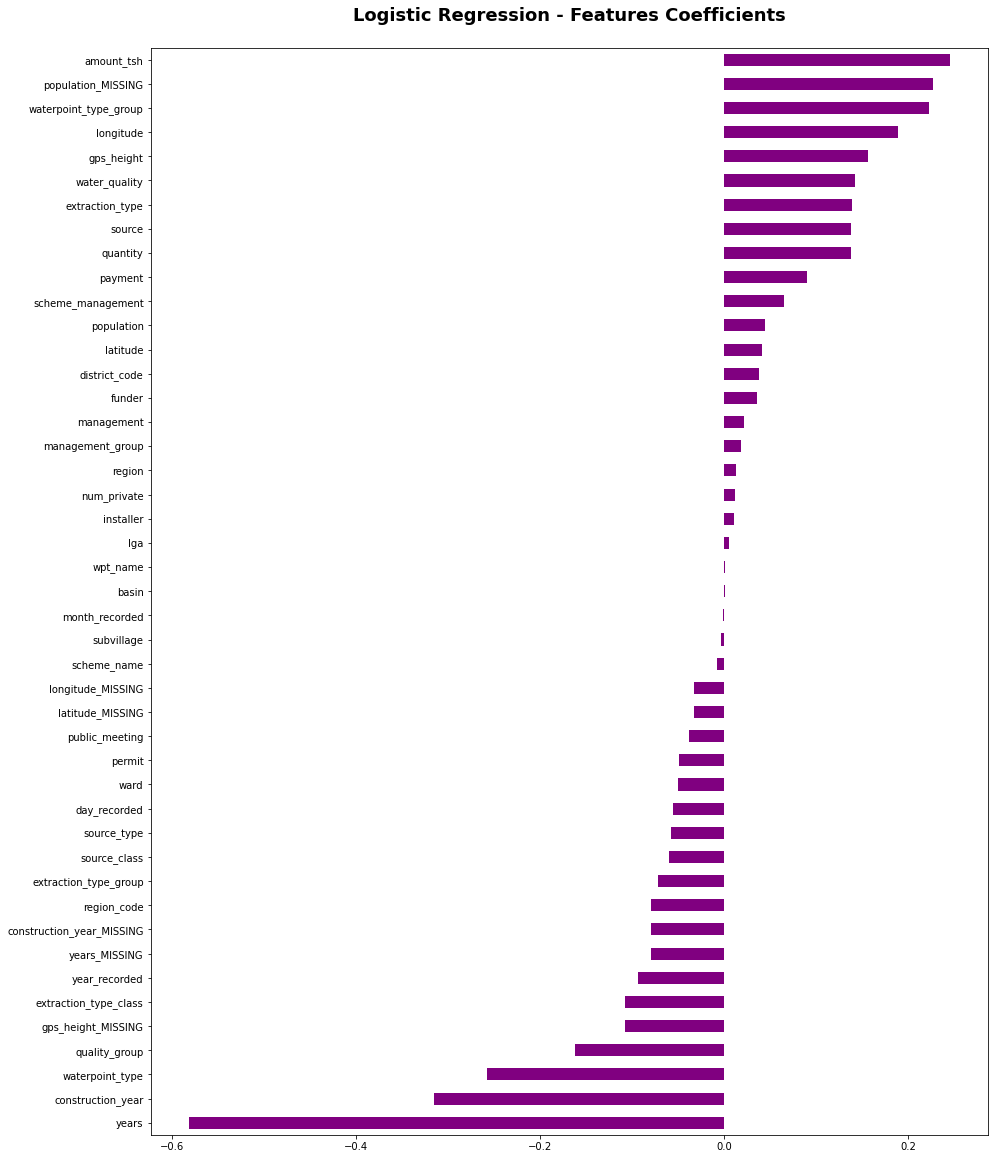

In [33]:
# Pull out elements from the pipeline:
model_lr = pipe_coefs.named_steps['logisticregression']
encoder_lr = pipe_coefs.named_steps['ordinalencoder']
encoded_lr = encoder_lr.transform(X_val).columns
coeffs = pd.Series(model_lr.coef_[0], encoded_lr)

# Plot the coefficients of my features:
plt.figure(figsize=(15, 20), facecolor='white')
coeffs.sort_values().plot.barh(color='purple')
plt.title('Logistic Regression - Features Coefficients\n', size=18, weight='bold');

In [34]:
# Look at a list of all features:
X_train.columns

Index(['amount_tsh', 'funder', 'gps_height', 'installer', 'longitude',
       'latitude', 'wpt_name', 'num_private', 'basin', 'subvillage', 'region',
       'region_code', 'district_code', 'lga', 'ward', 'population',
       'public_meeting', 'scheme_management', 'scheme_name', 'permit',
       'construction_year', 'extraction_type', 'extraction_type_group',
       'extraction_type_class', 'management', 'management_group', 'payment',
       'water_quality', 'quality_group', 'quantity', 'source', 'source_type',
       'source_class', 'waterpoint_type', 'waterpoint_type_group',
       'longitude_MISSING', 'latitude_MISSING', 'construction_year_MISSING',
       'gps_height_MISSING', 'population_MISSING', 'year_recorded',
       'month_recorded', 'day_recorded', 'years', 'years_MISSING'],
      dtype='object')

In [35]:
# Create a list of features to use in my model (all 45 features, less missing):
features = ['amount_tsh', 'funder', 'gps_height', 'installer', 'longitude', 'latitude', 'wpt_name', 
            'num_private', 'basin', 'subvillage', 'region', 'region_code', 'district_code', 'lga', 'ward', 
            'population', 'public_meeting', 'scheme_management', 'scheme_name', 'permit', 
            'construction_year', 'extraction_type', 'extraction_type_group', 'extraction_type_class', 
            'management', 'management_group', 'payment', 'water_quality', 'quality_group', 'quantity', 
            'source', 'source_type', 'source_class', 'waterpoint_type', 'waterpoint_type_group', 
            'year_recorded', 'month_recorded', 'day_recorded', 'years']

# Re-arrange X feature matrix to include only the above features:
X_train1 = X_train[features]
X_val1 = X_val[features]
X_test1 = X_test[features]

# Make a pipeline for the decision tree:
dt_pipe = make_pipeline(
    ce.OrdinalEncoder(),
    SimpleImputer(strategy='median'),
    DecisionTreeClassifier(random_state=97, min_samples_leaf=13)
    )

# Fit to train and score on validation set:
dt_pipe.fit(X_train1, y_train)
train_score = dt_pipe.score(X_train1, y_train)
val_score = dt_pipe.score(X_val1, y_val)

# Predict on the test set:
y_pred = dt_pipe.predict(X_test1)

print ('Decision Tree Train Accuracy Score:', train_score)
print ('Decision Tree Validation Accuracy Score:', val_score)

Decision Tree Train Accuracy Score: 0.8301683501683502
Decision Tree Validation Accuracy Score: 0.7592592592592593


X_train shape before OrdinalEncoding: (44550, 39) 

X_train shape after OrdinalEncoding: (44550, 39) 



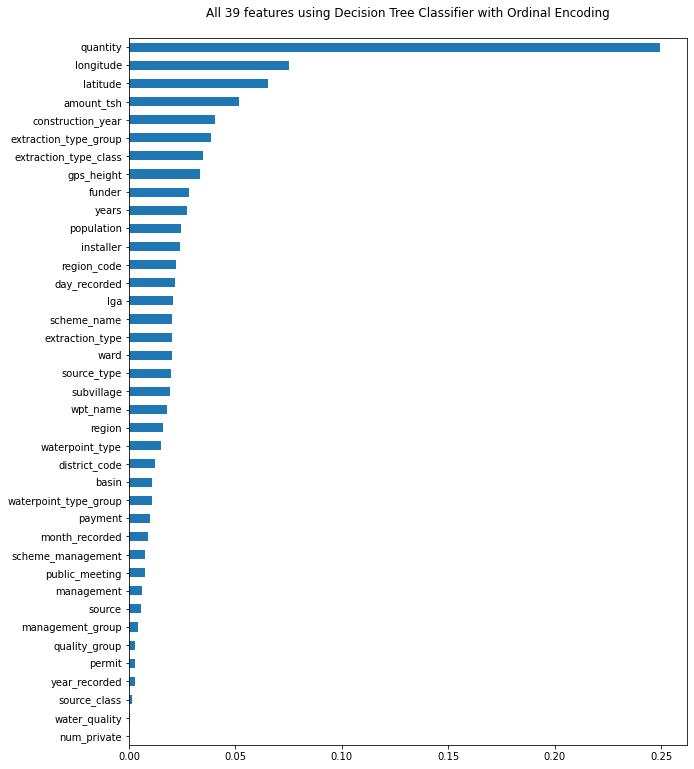

In [36]:
# Look at the shape before encoding:
print ('X_train shape before OrdinalEncoding:', X_train1.shape, '\n')

# Encode and look at the shape after encoding:
encoder_dt = dt_pipe.named_steps['ordinalencoder']
encoded_dt = encoder_dt.transform(X_train1)
print ('X_train shape after OrdinalEncoding:', X_train1.shape, '\n')

# Pull out the random forest to get feature importances:
dt = dt_pipe.named_steps['decisiontreeclassifier']

# Define a series that includes the feature importances:
importances_dt = pd.Series(dt.feature_importances_, encoded_dt.columns)

# Plot the top n feature importances:
n = 39 
plt.figure(figsize=(10, n/3), facecolor='white')
plt.title(f'All {n} features using Decision Tree Classifier with Ordinal Encoding\n')
importances_dt.sort_values()[-n:].plot.barh();

In [37]:
# Create a list of features to use in my model (all 45 features, less missing):
features = ['amount_tsh', 'funder', 'gps_height', 'installer', 'longitude', 'latitude', 'wpt_name', 
            'num_private', 'basin', 'subvillage', 'region', 'region_code', 'district_code', 'lga', 'ward', 
            'population', 'public_meeting', 'scheme_management', 'scheme_name', 'permit', 
            'construction_year', 'extraction_type', 'extraction_type_group', 'extraction_type_class', 
            'management', 'management_group', 'payment', 'water_quality', 'quality_group', 'quantity', 
            'source', 'source_type', 'source_class', 'waterpoint_type', 'waterpoint_type_group', 
            'year_recorded', 'month_recorded', 'day_recorded', 'years']

# Re-arrange X feature matrix to include only the above features:
X_train2 = X_train[features]
X_val2 = X_val[features]
X_test2 = X_test[features]

# Make a pipeline for the decision tree:
rf_pipe = make_pipeline(
    ce.OrdinalEncoder(),
    SimpleImputer(strategy='median'),
    RandomForestClassifier(random_state=97, min_samples_leaf=13)
    )

# Fit to train and score on validation set:
rf_pipe.fit(X_train2, y_train)
train_score = rf_pipe.score(X_train2, y_train)
val_score = rf_pipe.score(X_val2, y_val)

# Predict on the test set:
y_pred = rf_pipe.predict(X_test2)

print ('Random Forest Train Accuracy Score:', train_score)
print ('Random Forest Validation Accuracy Score:', val_score)

Random Forest Train Accuracy Score: 0.829270482603816
Random Forest Validation Accuracy Score: 0.7886868686868687


X_train shape before OrdinalEncoding: (44550, 39) 

X_train shape after OrdinalEncoding: (44550, 39) 



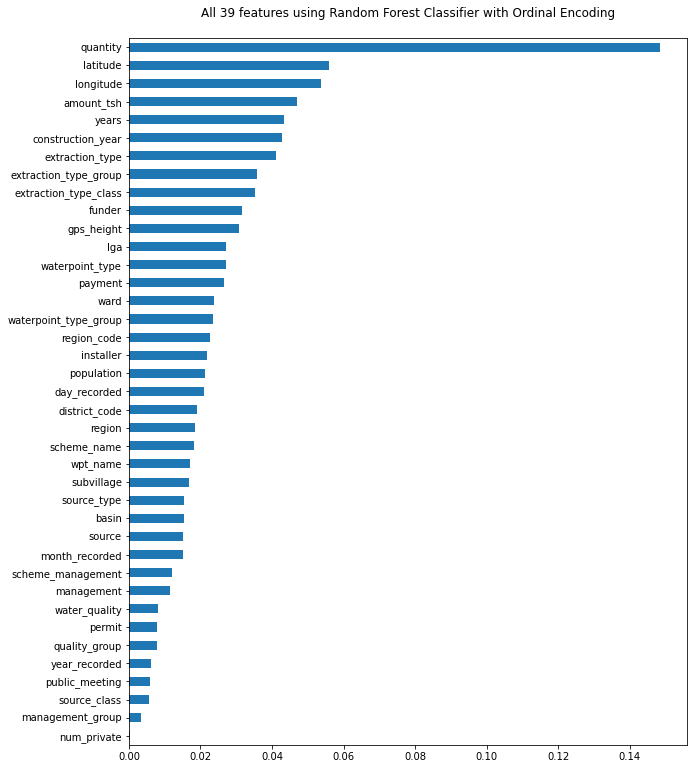

In [38]:
# Look at the shape before encoding:
print ('X_train shape before OrdinalEncoding:', X_train2.shape, '\n')

# Encode and look at the shape after encoding:
encoder_rf = rf_pipe.named_steps['ordinalencoder']
encoded_rf = encoder_rf.transform(X_train2)
print ('X_train shape after OrdinalEncoding:', X_train2.shape, '\n')

# Pull out the random forest to get feature importances:
rf = rf_pipe.named_steps['randomforestclassifier']

# Define a series that includes the feature importances:
importances_rf = pd.Series(rf.feature_importances_, encoded_rf.columns)

# Plot the top n feature importances:
n = 39 
plt.figure(figsize=(10, n/3), facecolor='white')
plt.title(f'All {n} features using Random Forest Classifier with Ordinal Encoding\n')
importances_rf.sort_values()[-n:].plot.barh();

In [39]:
# Create a list of features to use in my model (all 45 features, less missing):
  # High Card = , 'wpt_name', 'subvillage', 'scheme_name', 'ward', 'installer', 'funder'
  # Removed: , 'num_private', 'water_quality', 'quality_of_water', 'management_group', 
    # 'scheme_management', 'day_rec', 'month_rec', 
    # 'permit', 'payment_type', 'public_meeting', 'region_code'

features = ['amount_tsh', 'gps_height', 'longitude', 'latitude', 'population', 'quantity', 'source', 
            'waterpoint_type', 'years', 'extraction_type_group', 'source_class', 'management', 
            'construction_year', 'source_type', 'lga', 'extraction_type', 'basin', 'payment', 
            'extraction_type_class', 'quality_group', 'year_recorded', 'waterpoint_type_group', 'region', 
            'district_code']

# Re-arrange X feature matrix to include only the above features:
X_train2 = X_train[features]
X_val2 = X_val[features]
X_test2 = X_test[features]

# Make a pipeline for the decision tree:
rf_pipe = make_pipeline(
    ce.OrdinalEncoder(),
    SimpleImputer(strategy='median'),
    RandomForestClassifier(random_state=97, min_samples_leaf=3)
    )

# Fit to train and score on validation set:
rf_pipe.fit(X_train2, y_train)
train_score = rf_pipe.score(X_train2, y_train)
val_score = rf_pipe.score(X_val2, y_val)

# Predict on the test set:
y_pred = rf_pipe.predict(X_test2)

print ('Random Forest Train Accuracy Score:', train_score)
print ('Random Forest Validation Accuracy Score:', val_score)

Random Forest Train Accuracy Score: 0.8878338945005612
Random Forest Validation Accuracy Score: 0.8048484848484848


In [40]:
# Make a pipeline for SelectKBest and Logicstic Regression:
kbr_pipe = make_pipeline(
    ce.OrdinalEncoder(),
    SimpleImputer(),
    StandardScaler(),
    SelectKBest(k=39),
    LogisticRegression(n_jobs=-1)
)

K=5
kbr_scores = cross_val_score(kbr_pipe, X_train, y_train, cv=K, scoring='accuracy')
print (f'Accuracy for {K} folds - SelectKBest and Logistic Regression:', kbr_scores)

Accuracy for 5 folds - SelectKBest and Logistic Regression: [0.68776655 0.6318743  0.62446689 0.62817059 0.62906846]


In [41]:
# Look at the mean accuracy score for SelectKBest and Logistic Regression:
kbr_scores.mean()

0.6402693602693603

In [42]:
# Make new pipeline for random forest using Ordinal encoder:
rft_pipe = make_pipeline(
    ce.OrdinalEncoder(),
    SimpleImputer(strategy='mean'),
    RandomForestClassifier(n_estimators=79, n_jobs=-1, random_state=97)
)

k = 5
rft_scores = cross_val_score(rft_pipe, X_train, y_train, cv=k, scoring='accuracy')
print (f'Accuracy for {k} folds - Random Forest and Target Encoder:', -rft_scores)

Accuracy for 5 folds - Random Forest and Target Encoder: [-0.79708193 -0.79438833 -0.8006734  -0.79887767 -0.8016835 ]


In [43]:
# Look at the mean accuracy score for random forest:
rft_scores.mean()

0.7985409652076318

### Use scikit-learn for hyperparameter optimization with RandomizedSearchCV.


In [44]:
# Create a new pipeline:
rscv_pipe = make_pipeline(
    ce.OrdinalEncoder(),
    SimpleImputer(),
    RandomForestClassifier(random_state=42)
)

# Create a dictionary of parameters for the pipeline:
# param_dist = {
#     # 'targetencoder__min_samples_leaf':randint(1, 1000),    <-- Can't use with Ordinal
#     'simpleimputer__strategy':['mean', 'median'],
#     'randomforestClassifer__n_estimators':range(10, 200),  #<-- Keeps throwing an error.
#     'randomforestClassifer__max_depth':[3, 13, 20, 21], # <-- Keeps throwing an error.
#     'randomforestClassifer__max_features':uniform(0, 1)  #<-- Keeps throwing an error.
# }
param_distributions = {
    'randomforestclassifier__n_estimators': range(50, 500), 
    'randomforestclassifier__max_depth': [5, 10, 15, 20, None], 
    'randomforestclassifier__max_features': uniform(0, 1), 
    'randomforestclassifier__min_samples_leaf': [1, 10, 100], 
}

# Create my search:
search = RandomizedSearchCV(rscv_pipe, param_distributions=param_distributions, n_iter=3, cv=5, 
                            scoring='accuracy', verbose=10, return_train_score=True, n_jobs=-1)

# Fit my search:
search.fit(X_train, y_train);

Fitting 5 folds for each of 3 candidates, totalling 15 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:  1.8min
/usr/local/lib/python3.6/dist-packages/joblib/externals/loky/process_executor.py:691: UserWarning:

A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.

[Parallel(n_jobs=-1)]: Done   4 tasks      | elapsed:  3.6min
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:  5.5min
[Parallel(n_jobs=-1)]: Done  15 out of  15 | elapsed:  6.9min finished


In [45]:
print ('Best hyperparameters:', search.best_params_)
print ('Cross-Validation Best Accuracy:', search.best_score_)

Best hyperparameters: {'randomforestclassifier__max_depth': 15, 'randomforestclassifier__max_features': 0.3704552007433817, 'randomforestclassifier__min_samples_leaf': 1, 'randomforestclassifier__n_estimators': 438}
Cross-Validation Best Accuracy: 0.8010325476992144


### Submit your predictions to our Kaggle competition.  <--- DONE!

- Go to our Kaggle InClass competition webpage. 
- Use the blue **Submit Predictions** button to upload your CSV file. 
- Or you can use the Kaggle API to submit your predictions.

### Commit your notebook to your fork of the GitHub repo.  <--- DONE!

In [46]:
# Get new submission csv to upload to the Kaggle Challenge:
submission=sample_submission[['id']].copy()
submission['status_group']=y_pred
submission.to_csv("Joanne_Middour_Submission14.csv",index=False)

In [47]:
# Look at the head of my submission:
submission.head()

,id,status_group
0,50785,functional
1,51630,functional
2,17168,functional
3,45559,non functional
4,49871,functional


In [50]:
# score randomized search cv:
train_score = search.score(X_train, y_train)
val_score = search.score(X_val, y_val)

# Predict on test:
y_pred_s = search.predict(X_test)

# Look at the accuracy scores:
print ('Randomized Search CV Train Accuracy Score:', train_score)  
print ('Randomized Search CV Validation Accuracy Score:', val_score, '\n')
print ('Differance between Train and Validate Scores:', train_score - val_score)

Randomized Search CV Train Accuracy Score: 0.9146576879910213
Randomized Search CV Validation Accuracy Score: 0.8063973063973064 

Differance between Train and Validate Scores: 0.10826038159371487


In [51]:
# Get new submission csv to upload to the Kaggle Challenge:
submission=sample_submission[['id']].copy()
submission['status_group']=y_pred_s
submission.to_csv("Joanne_Middour_Submission15.csv",index=False)

In [52]:
# Look at the head of my submission:
submission.head()

,id,status_group
0,50785,functional
1,51630,functional
2,17168,functional
3,45559,non functional
4,49871,functional


### BONUS: Stacking!

Here's some code you can use to "stack" multiple submissions, which is another form of ensembling:

```python
import pandas as pd

# Filenames of your submissions you want to ensemble
files = ['submission-01.csv', 'submission-02.csv', 'submission-03.csv']

target = 'status_group'
submissions = (pd.read_csv(file)[[target]] for file in files)
ensemble = pd.concat(submissions, axis='columns')
majority_vote = ensemble.mode(axis='columns')[0]

sample_submission = pd.read_csv('sample_submission.csv')
submission = sample_submission.copy()
submission[target] = majority_vote
submission.to_csv('my-ultimate-ensemble-submission.csv', index=False)
```

## Stretch Goals



### Reading
- Jake VanderPlas, [Python Data Science Handbook, Chapter 5.3](https://jakevdp.github.io/PythonDataScienceHandbook/05.03-hyperparameters-and-model-validation.html), Hyperparameters and Model Validation
- Jake VanderPlas, [Statistics for Hackers](https://speakerdeck.com/jakevdp/statistics-for-hackers?slide=107)
- Ron Zacharski, [A Programmer's Guide to Data Mining, Chapter 5](http://guidetodatamining.com/chapter5/), 10-fold cross validation
- Sebastian Raschka, [A Basic Pipeline and Grid Search Setup](https://github.com/rasbt/python-machine-learning-book/blob/master/code/bonus/svm_iris_pipeline_and_gridsearch.ipynb)
- Peter Worcester, [A Comparison of Grid Search and Randomized Search Using Scikit Learn](https://blog.usejournal.com/a-comparison-of-grid-search-and-randomized-search-using-scikit-learn-29823179bc85)



### Doing
- Add your own stretch goals!
- Try other [categorical encodings](https://contrib.scikit-learn.org/categorical-encoding/). See the previous assignment notebook for details.
- In additon to `RandomizedSearchCV`, scikit-learn has [`GridSearchCV`](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html). Another library called scikit-optimize has [`BayesSearchCV`](https://scikit-optimize.github.io/notebooks/sklearn-gridsearchcv-replacement.html). Experiment with these alternatives.
- _[Introduction to Machine Learning with Python](http://shop.oreilly.com/product/0636920030515.do)_ discusses options for "Grid-Searching Which Model To Use" in Chapter 6:

> You can even go further in combining GridSearchCV and Pipeline: it is also possible to search over the actual steps being performed in the pipeline (say whether to use StandardScaler or MinMaxScaler). This leads to an even bigger search space and should be considered carefully. Trying all possible solutions is usually not a viable machine learning strategy. However, here is an example comparing a RandomForestClassifier and an SVC ...

The example is shown in [the accompanying notebook](https://github.com/amueller/introduction_to_ml_with_python/blob/master/06-algorithm-chains-and-pipelines.ipynb), code cells 35-37. Could you apply this concept to your own pipelines?